<a href="https://colab.research.google.com/github/patbaa/physdl/blob/master/notebooks/03/fully_connected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Our first fully connected neural network

_Author: Pataki Bálint Ármin_

In [1]:
import numpy as np
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


## 1. We will use the MNIST handwritten digits dataset
read more about: http://yann.lecun.com/exdb/mnist/

In [2]:
??mnist
# you can check the source code of any imported function this way

Let's load and check the shape of the data!

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

We have 60.000 images in the train set, 10.000 in the test set. Each of them is 28x28 pixel grayscale images.

Now it's time to visualize a few of them!

In [5]:
def show_train_imgs(n=8, m=5):
    for i in range(m):
        for j in range(n):
            idx = np.random.randint(len(y_train))
            plt.subplot(int('1' + str(n) + str(j+1)))
            plt.imshow(x_train[idx], cmap='gray')
            plt.title(y_train[idx], fontsize=30)
            plt.axis('off')
        plt.show()

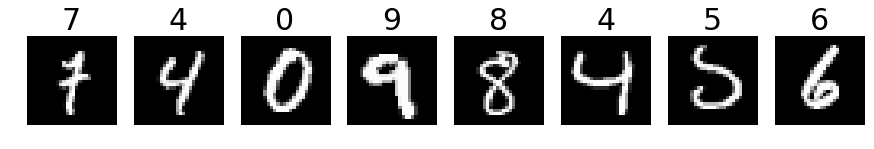

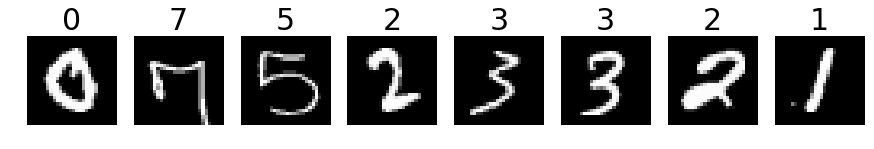

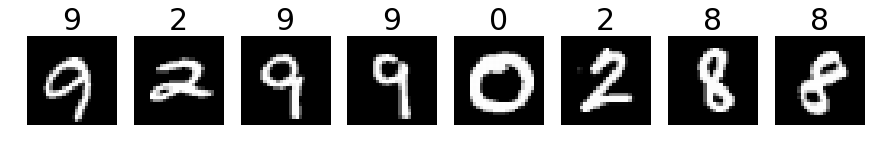

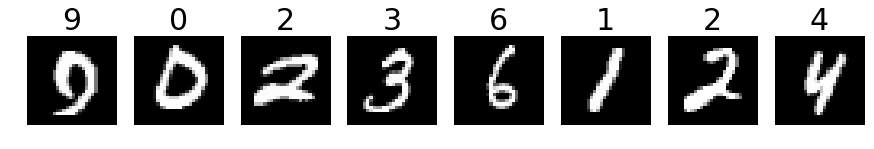

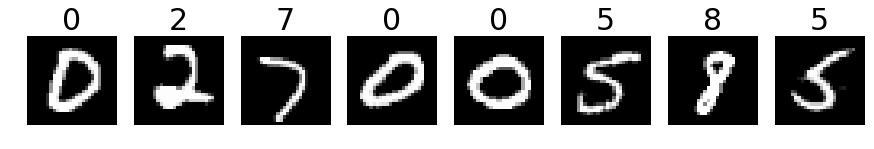

In [6]:
plt.rcParams['figure.figsize'] = (15, 5)
show_train_imgs(8)

In [7]:
x_train.min(), x_train.max()

(0, 255)

Convert them to single vectors and scale the pixel values to a 0-1 range.

In [8]:
x_train = x_train.reshape(60000, 28*28)/255
x_test = x_test.reshape(10000, 28*28)/255

x_train.shape, x_test.shape, x_train.min(), x_train.max()

((60000, 784), (10000, 784), 0.0, 1.0)

#### there is no distance between the digist for us! (each is a completely different category)
Let's encode them accordingly (one-hot encoding).

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [11]:
y_train_oh[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 2. Building a dummy neural network

In [12]:
model = Sequential()
model.add(Dense(784, input_dim=784, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

The .summary() is a super useful function!

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,182,874
Trainable params: 1,182,874
Non-trainable params: 0
_________________________________________________________________


Sanity check for the number of parameters.

In [14]:
784*784+784, 784*512+512, 512*256+256, 256*128+128, 128*10+10

(615440, 401920, 131328, 32896, 1290)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
history = model.fit(x=x_train, y=y_train_oh, batch_size=64, epochs=15, validation_data=(x_test, y_test_oh))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.7703 - acc: 0.8068 - val_loss: 0.3153 - val_acc: 0.9120
Epoch 2/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2806 - acc: 0.9203 - val_loss: 0.2344 - val_acc: 0.9340
Epoch 3/15
60000/60000 [==============================] - 2s 31us/step - loss: 0.2203 - acc: 0.9370 - val_loss: 0.2044 - val_acc: 0.9397
Epoch 4/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.1825 - acc: 0.9471 - val_loss: 0.1673 - val_acc: 0.9513
Epoch 5/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.1555 - acc: 0.9553 - val_loss: 0.1501 - val_acc: 0.9558
Epoch 6/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.1356 - acc: 0.9609 - val_loss: 0.1335 - val_acc: 0.9614
Epoch 7/15
60000/60000 [==============================] - 2s 33us/step - loss: 0.1195 - acc: 0.9654 - val_loss: 0.1211 - val_acc

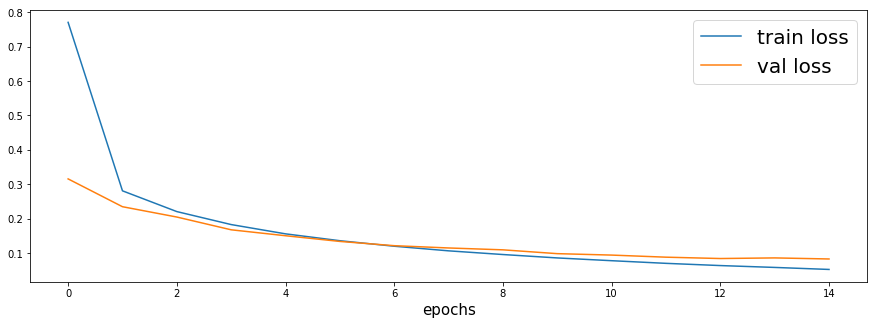

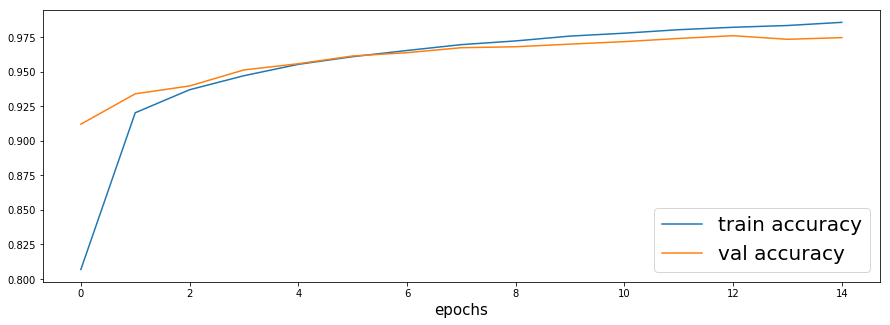

In [17]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('epochs', fontsize=15)
plt.legend(fontsize=20)
plt.show()
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.xlabel('epochs', fontsize=15)
plt.legend(fontsize=20)
plt.show()

## In less than 15 second we reached >95% accuracy!

## 3. Checking the predictions - misclassified are highlighted with a red dot

In [18]:
def show_predictions(n=5, m=5):
    for j in range(m):
        idx_start = np.random.randint(len(x_test) - n)
        preds = model.predict(x_test[idx_start:idx_start+5])
        true_labels = y_test[idx_start:idx_start+5]

        for i in range(n):
            plt.subplot(int('1' + str(n) + str(i+1)))
            predstr = 'pred: ' + str(preds[i].argmax()) + ', prob: ' + str(int(np.round(preds[i].max()*100,0))) + '%'
            plt.title(predstr + ' / true: ' + str(true_labels[i]),fontsize=10)
            plt.imshow(x_test[idx_start+i].reshape(28, 28)*255, cmap='gray')
            if(preds[i].argmax() != true_labels[i]):
                plt.scatter([14], [14], s=500, c='r')
            plt.axis('off')
        plt.show()

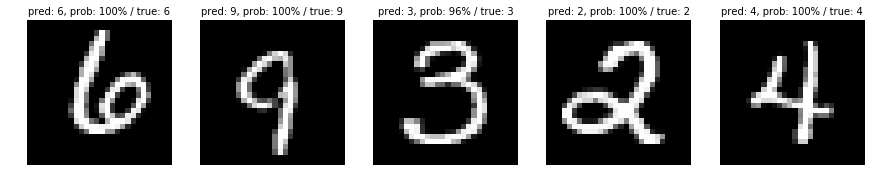

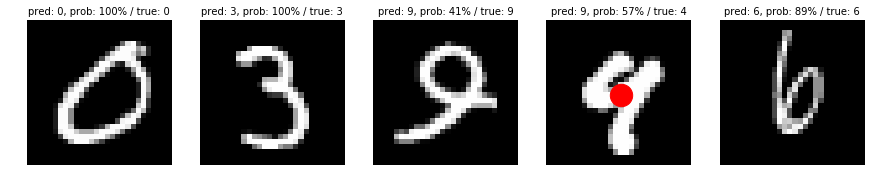

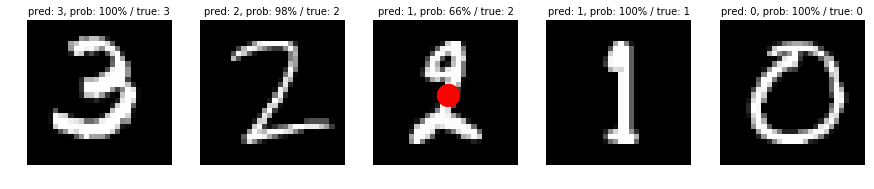

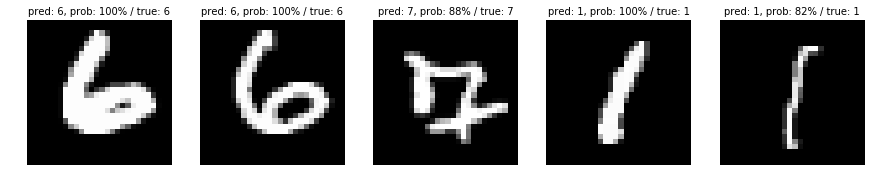

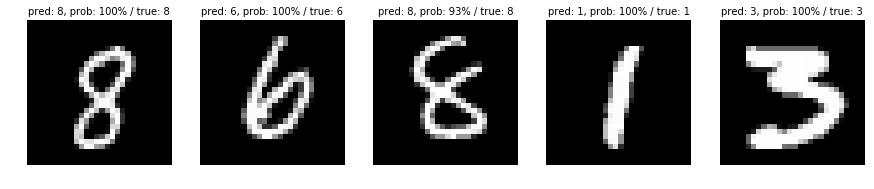

In [19]:
show_predictions()